In [1]:
!pip install -q autoviz
!pip install -q -U --pre pycaret

In [2]:
!pip -q install transformers
!pip -q install torch

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pycaret import regression
from sklearn.model_selection import cross_val_score

In [5]:
df = pd.read_csv('./data/malicious_phish.csv', nrows = 1000)
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [6]:
df.tail()

,url,type
995,youtube.com/watch?v=EcGsM-PNQHQ,benign
996,bloomberg.com/news/2011-08-28/dust-bowl-in-tex...,benign
997,http://www.slavia.sk/home,defacement
998,innerearbrigade.com/,benign
999,brokenbells.com/,benign


In [7]:
df.shape

(1000, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     1000 non-null   object
 1   type    1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [9]:
df.dtypes

url     object
type    object
dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['url', 'type']

In [12]:
le = LabelEncoder()
encoded_data = le.fit_transform(df['type'])
print(encoded_data)

[3 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 3 0 0 0 0 0 0 3 0 0 0 0 0 0 1 0
 0 2 1 3 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 3 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 3 0 0 1 0 0 0 3 0 1 0 0 1 0 1 0 0 1 3 3 0 0 0 0
 1 0 0 0 2 0 1 0 0 0 0 0 0 1 0 3 0 0 0 0 0 1 0 0 0 0 1 0 3 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 2 0 3 0 0 0 1 1 0 0 1 3 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 0 1 0 0 0 1 0 0 0 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 3 0 3 0 0 0 1 0 2 0 0 2 0 0 3 0 0 0 0 3 0 1 0 1 1 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0
 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 1 0
 0 0 0 1 1 0 2 0 0 0 3 0 0 0 0 0 3 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1
 0 2 0 0 0 0 0 0 0 3 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 3 0 1
 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 3 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 1 0 0 0 1 2 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 3 3 3 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 

In [14]:
df

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
995,youtube.com/watch?v=EcGsM-PNQHQ,benign
996,bloomberg.com/news/2011-08-28/dust-bowl-in-tex...,benign
997,http://www.slavia.sk/home,defacement
998,innerearbrigade.com/,benign


In [15]:
df['type'] = encoded_data

In [16]:
df

,url,type
0,br-icloud.com.br,3
1,mp3raid.com/music/krizz_kaliko.html,0
2,bopsecrets.org/rexroth/cr/1.htm,0
3,http://www.garage-pirenne.be/index.php?option=...,1
4,http://adventure-nicaragua.net/index.php?optio...,1
...,...,...
995,youtube.com/watch?v=EcGsM-PNQHQ,0
996,bloomberg.com/news/2011-08-28/dust-bowl-in-tex...,0
997,http://www.slavia.sk/home,1
998,innerearbrigade.com/,0


In [17]:
df.isnull().any()

url     False
type    False
dtype: bool

In [18]:
df.dtypes

url     object
type     int64
dtype: object

In [19]:
class_counts = df['type'].value_counts()

print('Class distribution:')
print(class_counts)

Class distribution:
0    734
1    181
3     54
2     31
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

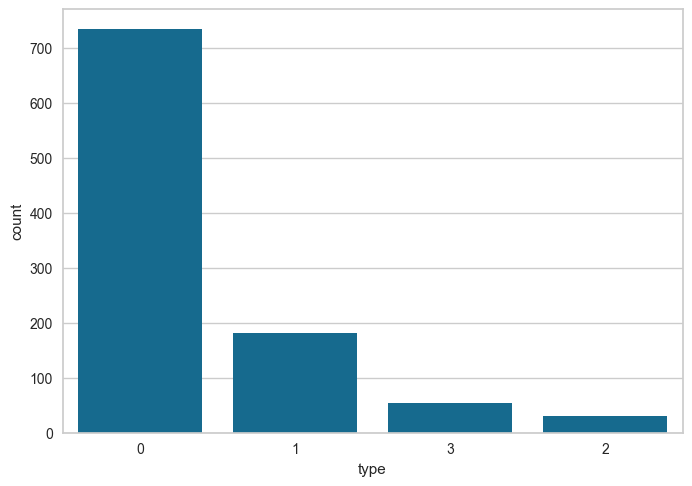

In [20]:
sns.countplot(x = 'type', data = df, order = df['type'].value_counts().index)

In [21]:
from transformers import BertModel, BertTokenizer
import torch

model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [22]:
def extract_features(text):
    input_ids = torch.tensor([tokenizer.encode(text, add_special_tokens=True)])
    with torch.no_grad():
        outputs = model(input_ids)
        hidden_states = outputs[2]
    token_vecs = []
    for layer in range(-4, 0):
        token_vecs.append(hidden_states[layer][0])
    features = []
    for token in token_vecs:
        features.append(torch.mean(token, dim=0))
    return torch.stack(features)

In [23]:
features = []
for i in range(len(df)):
    features.append(extract_features(df.iloc[i]["url"]))
features = torch.cat(features).numpy()

In [24]:
features

array([[ 0.20866112, -0.30191997,  0.08405093, ..., -0.6917087 ,
         0.32647565,  0.46026933],
       [ 0.1642284 , -0.33757576, -0.01675432, ..., -0.50350404,
         0.23100677,  0.60487735],
       [ 0.18217243, -0.2528905 , -0.06339709, ..., -0.27169797,
         0.14275123,  0.47711965],
       ...,
       [ 0.5681486 , -0.46876794, -0.29942298, ..., -0.46464184,
        -0.0783677 , -0.15953965],
       [ 0.63260233, -0.43139473, -0.37300485, ..., -0.23353842,
        -0.1796665 , -0.16202751],
       [ 0.6228851 , -0.07720836, -0.41445556, ...,  0.06254122,
        -0.20890923, -0.17801094]], dtype=float32)

In [25]:
types = df['type'].values
types

array([3, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 3, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 3,
       0, 0, 1, 0, 0, 0, 3, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 3, 3, 0, 0, 0,
       0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 3, 0, 0, 0, 1, 1, 0, 0, 1, 3, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 1, 0, 2, 0,
       0, 2, 0, 0, 3, 0, 0, 0, 0, 3, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [26]:
print(features.shape)
print(types.shape)

(4000, 768)
(1000,)


In [27]:
features_reshaped = features.reshape((1000, -1))
dataset = np.hstack((features_reshaped, types.reshape((-1, 1))))

In [28]:
features_reshaped.shape

(1000, 3072)

In [29]:
dataset

array([[ 0.20866112, -0.30191997,  0.08405093, ...,  0.09338031,
         0.28850079,  3.        ],
       [ 0.12214119, -0.1404354 ,  0.56440645, ..., -0.18797344,
        -0.10648375,  0.        ],
       [ 0.38706836, -0.01241223,  0.49862283, ..., -0.15056248,
         0.12027869,  0.        ],
       ...,
       [ 0.31936789, -0.52491611,  0.29337373, ..., -0.66254437,
         0.10895996,  1.        ],
       [ 0.66745079, -0.72515941,  0.37217537, ..., -0.12280717,
         0.22292766,  0.        ],
       [ 0.43090573, -0.41795442,  0.0405664 , ..., -0.20890923,
        -0.17801094,  0.        ]])

In [30]:
dataset.shape

(1000, 3073)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [33]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

y_train_s = pd.Series(y_train)
y_train_res = pd.Series (y_train_res)
print('Class distribution before resampling:', y_train_s.value_counts())
print('Class distribution after resampling:', y_train_res.value_counts())

Class distribution before resampling: 0.0    593
1.0    138
3.0     45
2.0     24
dtype: int64
Class distribution after resampling: 0.0    593
1.0    593
3.0    593
2.0    593
dtype: int64


In [34]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = clf.predict(X_test)

In [36]:
type(X_test)
X_test.shape

(200, 3072)

In [37]:
pred = extract_features("http://www.824555.com/app/member/SportOption.php?uid=guest&langx=gb").numpy()
pred = np.reshape(pred, (1, 3072))
clf.predict(pred)

array([2.])

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [40]:
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[140   0   0   1]
 [  1  41   1   0]
 [  1   1   4   1]
 [  1   1   0   7]]


In [41]:
print("\nClassification Report:\n", cr)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       141
         1.0       0.95      0.95      0.95        43
         2.0       0.80      0.57      0.67         7
         3.0       0.78      0.78      0.78         9

    accuracy                           0.96       200
   macro avg       0.88      0.82      0.85       200
weighted avg       0.96      0.96      0.96       200

